### 3D Staggering example using a 3D Mimetic laplacian

In [1]:
import numpy as np
from scipy.sparse.linalg import spsolve

In [2]:
from core import *

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
m = 5  # -> 7
n = 6  # -> 8
o = 7  # -> 9

L = lap3D(2, m, 1, n, 1, o, 1)  # 3D Mimetic laplacian operator

for i in range((m+2)*(n+2)*(o+2)):
    if L[i,i] == 0:
        L[i,i] = 1  # Impose Dirichlet BC

RHS = np.zeros((m+2, n+2, o+2), dtype=np.float)

RHS[..., 0] = 100  # Known value at the cube's front face

RHS = np.reshape(RHS, ((m+2)*(n+2)*(o+2)), order='F')

SOL = spsolve(L, RHS)  # L\RHS

SOL = np.reshape(SOL, ((m+2), (n+2), (o+2)), order='F')

/Users/nutrik/Documents/Science/scodes/Python/pymole/core/div3D.py:27: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  Im[1:m+1, :] = sparse.eye(m, m, dtype=np.float, format='csr')
/Users/nutrik/Documents/Science/scodes/Python/pymole/core/div3D.py:28: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  In[1:n+1, :] = sparse.eye(n, n, dtype=np.float, format='csr')
/Users/nutrik/Documents/Science/scodes/Python/pymole/core/div3D.py:29: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  Io[1:o+1, :] = sparse.eye(o, o, dtype=np.float, format='csr')
/Users/nutrik/Documents/Science/scodes/Python/pymole/core/div1D.py:53: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  D[i, j:j+k] = coeffs
/Users/nutrik/Documents/Science/s

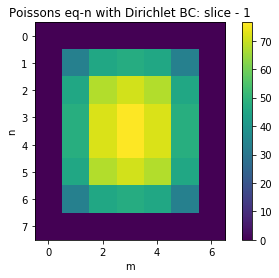

In [5]:
p = 1 #  Page to be displayed
page = SOL[..., p]

cs = plt.imshow(page.T)
plt.colorbar(cs)
plt.title('Poisson''s eq-n with Dirichlet BC: slice - {}'.format(p))
plt.xlabel('m')
plt.ylabel('n');